In [3]:
import numpy as np
import pandas as pd
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=14, color='grey')
plt.rc('ytick', labelsize=14, color='grey')
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)
plt.rc('savefig', dpi=330, bbox='tight')

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
ddpg = pd.read_csv('../../log/ddpg_test.csv', index_col=0)
ddpg.index = pd.date_range(start='1/1/2015', end='1/1/2016', freq='15T')[1:-1]
ddpg['officeHour'] = (ddpg.dayOfWeek<5) & (ddpg.hour<20) & (ddpg.hour>6)

In [29]:
ddpg

,hour,dayOfWeek,outTemp,outSolar,outRH,conf1Temp,conf2Temp,enOff1Temp,enOff2Temp,enOff3Temp,...,opOff3Reheat,opOff4FR,opOff4Reheat,cost_energy,cost_comfort,temp_min,temp_max,UDH,reward,officeHour
2015-01-01 00:15:00,0.0,3.0,6.950,0.0,86.00,20.653363,20.651804,19.463907,19.455756,19.346094,...,0.0,0.908852,0.0,5.960464e-07,0.327342,19.285605,21.427839,0.0,-0.327342,False
2015-01-01 00:30:00,0.0,3.0,7.075,0.0,88.00,20.691606,20.690616,19.510071,19.502894,19.384959,...,0.0,0.958174,0.0,0.000000e+00,0.315973,19.329095,21.452402,0.0,-0.315973,False
2015-01-01 00:45:00,0.0,3.0,7.200,0.0,90.00,20.732052,20.733744,19.561218,19.557821,19.431288,...,0.0,0.958235,0.0,0.000000e+00,0.303283,19.380258,21.475754,0.0,-0.303283,False
2015-01-01 01:00:00,1.0,3.0,7.200,0.0,90.00,20.697282,20.698704,19.553167,19.549542,19.431371,...,0.0,0.958287,0.0,0.000000e+00,0.306029,19.384130,21.447634,0.0,-0.306029,False
2015-01-01 01:15:00,1.0,3.0,7.200,0.0,90.00,20.609781,20.609195,19.500172,19.493804,19.395887,...,0.0,0.958946,0.0,0.000000e+00,0.320675,19.349725,21.380056,0.0,-0.320675,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:45:00,22.0,3.0,10.600,0.0,100.00,20.433782,20.822016,20.401284,20.323875,20.568923,...,0.0,0.964068,0.0,0.000000e+00,0.145390,20.323875,21.786885,0.0,-0.145390,False
2015-12-31 23:00:00,23.0,3.0,10.725,0.0,99.25,20.418568,20.797771,20.393483,20.316139,20.563463,...,0.0,0.964022,0.0,0.000000e+00,0.147573,20.316139,21.781235,0.0,-0.147573,False
2015-12-31 23:15:00,23.0,3.0,10.850,0.0,98.50,20.416947,20.789215,20.396288,20.319501,20.566034,...,0.0,0.963954,0.0,0.000000e+00,0.147563,20.319501,21.775851,0.0,-0.147563,False
2015-12-31 23:30:00,23.0,3.0,10.975,0.0,97.75,20.420656,20.788403,20.402251,20.326142,20.571081,...,0.0,0.963727,0.0,0.000000e+00,0.146720,20.326142,21.773506,0.0,-0.146720,False


In [7]:
ddpg.columns

Index(['hour', 'dayOfWeek', 'outTemp', 'outSolar', 'outRH', 'conf1Temp',
       'conf2Temp', 'enOff1Temp', 'enOff2Temp', 'enOff3Temp', 'opOff1Temp',
       'opOff2Temp', 'opOff3Temp', 'opOff4Temp', 'ahuSAT', 'conf1FR',
       'conf1Reheat', 'conf2FR', 'conf2Reheat', 'enOff1FR', 'enOff1Reheat',
       'enOff2FR', 'enOff2Reheat', 'enOff3FR', 'enOff3Reheat', 'opOff1FR',
       'opOff1Reheat', 'opOff2FR', 'opOff2Reheat', 'opOff3FR', 'opOff3Reheat',
       'opOff4FR', 'opOff4Reheat', 'cost_energy', 'cost_comfort', 'temp_min',
       'temp_max', 'UDH', 'reward'],
      dtype='object')

In [8]:
ddpg['UDH'].sum()/(9*4*14*365)

1.1790365780915602

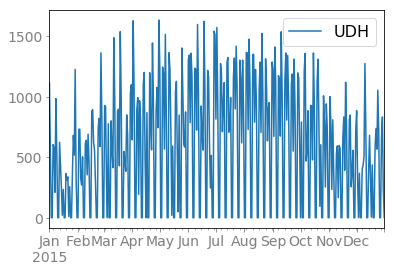

In [9]:
ddpg[['UDH']].resample('D').sum().plot()

In [11]:
zones = ['conf1', 'conf2', 'enOff1', 'enOff2', 'enOff3', 'opOff1', 'opOff2', 'opOff3', 'opOff4']

temps = [zone+'Temp' for zone in zones]
reheats = [zone+'Reheat' for zone in zones]
frs = [zone+'FR' for zone in zones]

Cair = 1005

## Time series

In [ ]:
data = ddpg.copy()

fig_path = 'fig/ts'

In [24]:
def plot_ts(date, data, fig_name=None):
    data = data.truncate(before=date[0], after=date[1])

    fig, axs = plt.subplots(4, 1, figsize=(20, 15), sharex=True)
    fig.suptitle(fig_name,fontsize=20)

    _x_ticks = range(data.shape[0])

    axs[0].set_title('Ambient Weather')
    axs[0].plot(_x_ticks, data['outTemp'].values, c=default_colors[0])
    axs[0].set_ylabel('Temperature \n[$^\circ$C]')
    axs[0].yaxis.label.set_color(default_colors[0])
    ax_t=axs[0].twinx()
    ax_t.plot(_x_ticks, data['outSolar'].values, c=default_colors[1])
    ax_t.set_ylabel('Solar Radiation [kWh/m2]')  
    ax_t.yaxis.label.set_color(default_colors[1])

    axs[1].set_title('Zone Temperature')
    axs[1].set_ylabel('Temperature \n[$^\circ$C]')
    axs[1].plot(_x_ticks, data[temps].mean(axis=1).values, c=default_colors[0], label='Zone Mean Temp.')

    axs[1].plot(_x_ticks, data[temps[0]].values, c=default_colors[0], alpha=0.3, label='Zone Temp.')
    for temp in temps[1:]:
        axs[1].plot(_x_ticks, data[temp].values, c=default_colors[0], alpha=0.2)
    axs[1].plot((_x_ticks[0],_x_ticks[-1]), (24, 24), 'g--', label='Comfort range')
    axs[1].plot((_x_ticks[0],_x_ticks[-1]), (20, 20), 'g--')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[1].yaxis.label.set_color(default_colors[0])

    axs[2].set_title('Supply Air Temperature')
    axs[2].set_ylabel('Temperature \n[$^\circ$C]')
    axs[2].plot(_x_ticks, data['ahuSAT'].values, c=default_colors[0], label='AHU Supply Air Temp.')
    axs[2].yaxis.label.set_color(default_colors[0])
    # for reheat,fr in zip(reheats, frs):
    #     zoneAirTemp = data['ahuSAT'].values + data[reheat].values/(data[fr].values*Cair)
    #     axs[2].plot(_x_ticks, zoneAirTemp, c=default_colors[0], alpha=0.3)
    ax_t=axs[2].twinx()
    for reheat in reheats:
        ax_t.plot(_x_ticks, data[reheat].values, c=default_colors[1], alpha=0.3)
    ax_t.set_ylabel('Terminal Reheat [W]')  
    ax_t.yaxis.label.set_color(default_colors[1])    

    axs[3].set_title('Supply Air Flow Rate')
    axs[3].set_ylabel('Flow Rate \n[kg/s]')
    for fr in frs:
        axs[3].plot(_x_ticks, data[fr].values, c=default_colors[0], alpha=0.3)
    axs[3].yaxis.label.set_color(default_colors[0])

    plt.xticks(_x_ticks[::4*6], data.index[::4*6].strftime('%b-%d %H'))
    if fig_name:
        plt.savefig('{}/{}.png'.format(fig_path, fig_name))

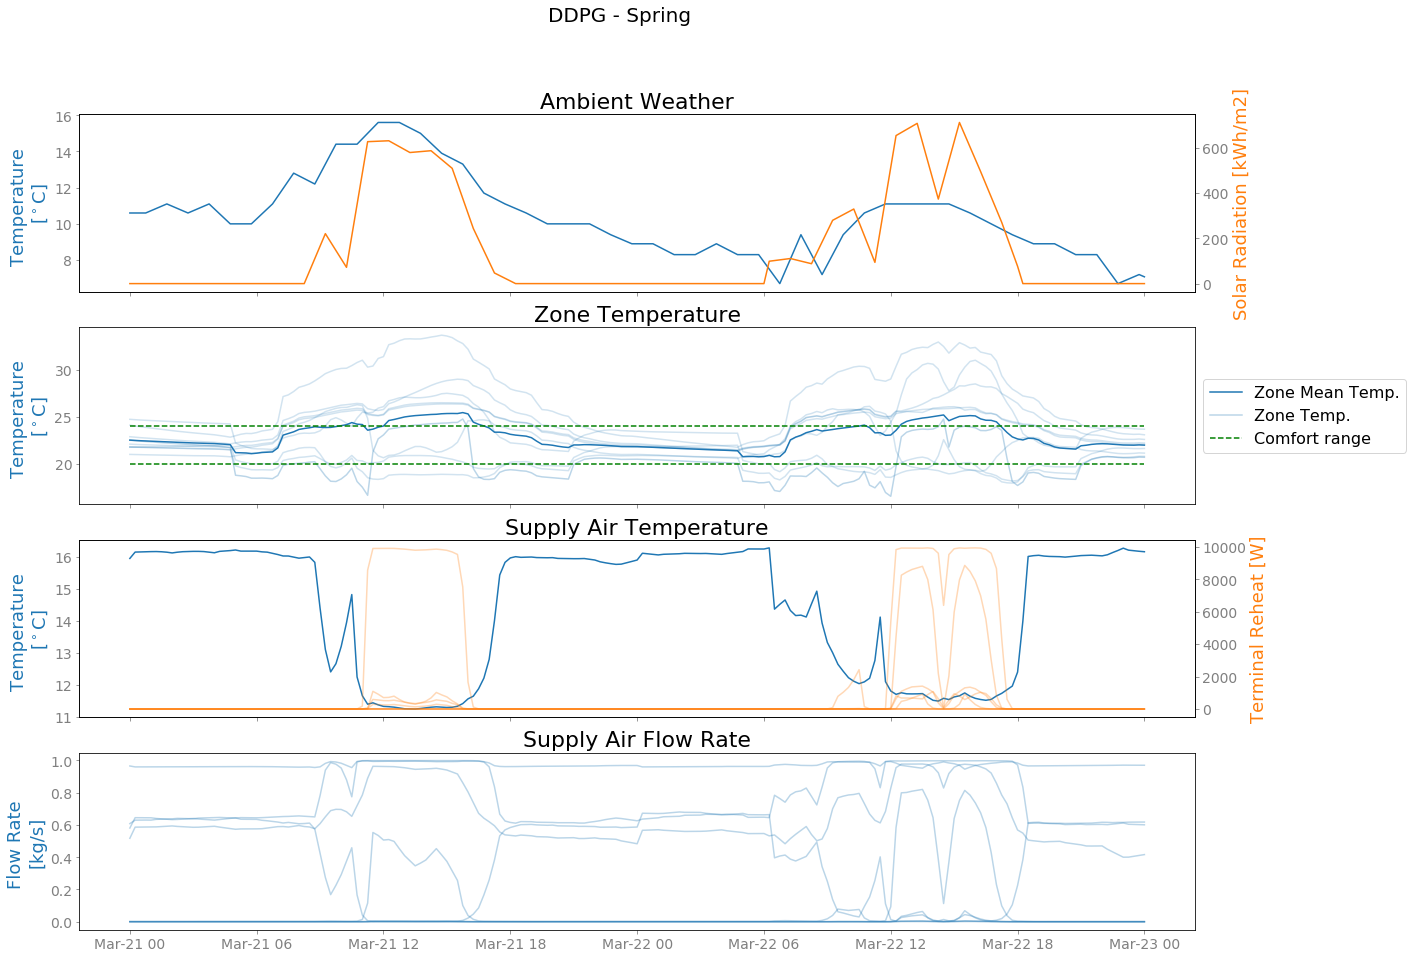

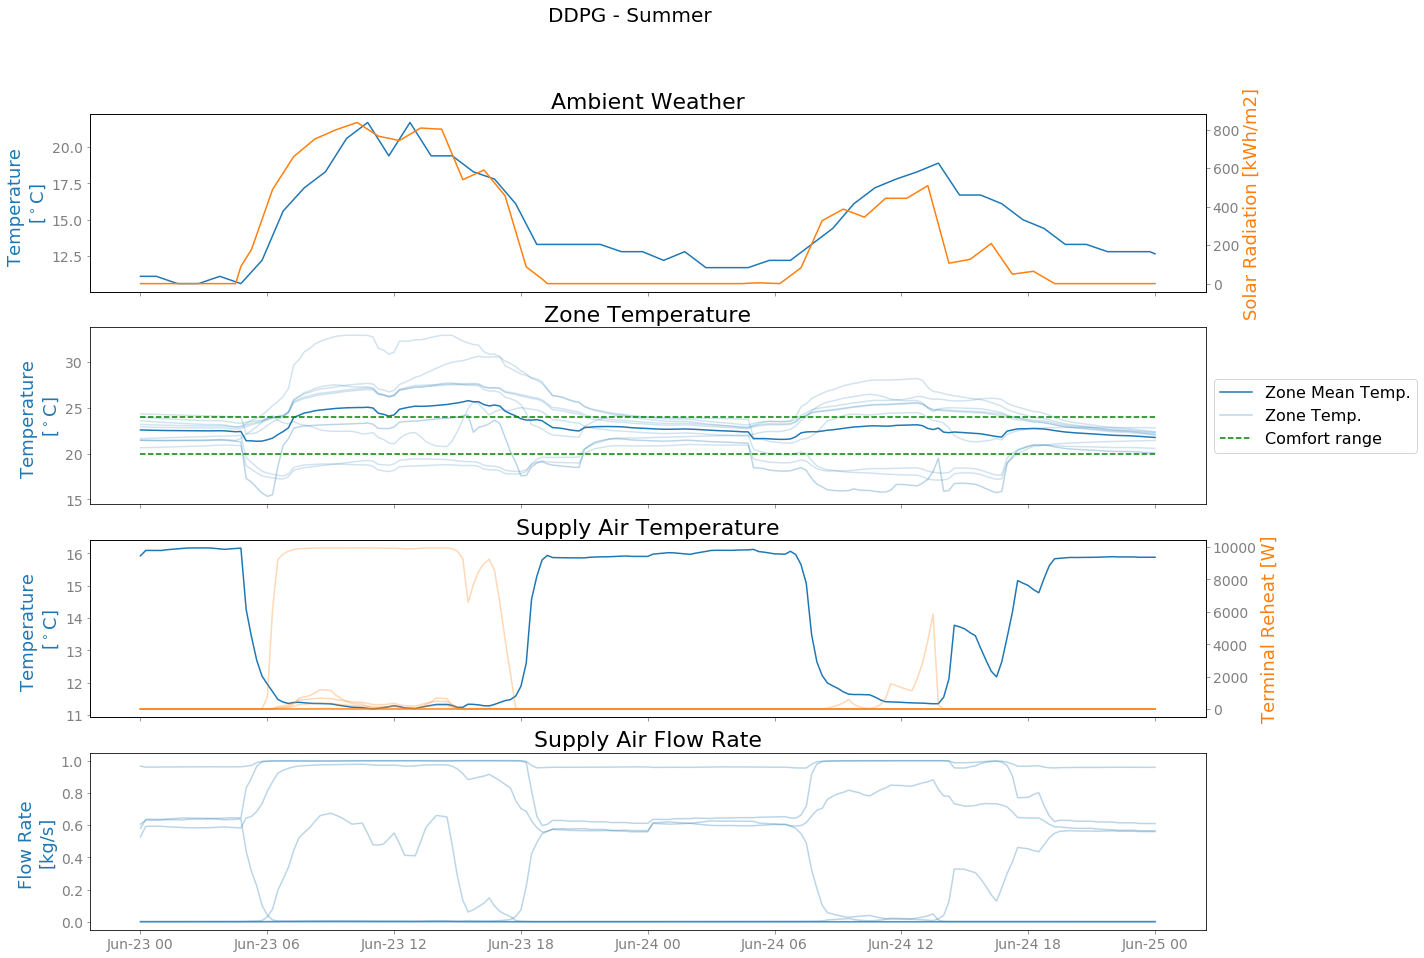

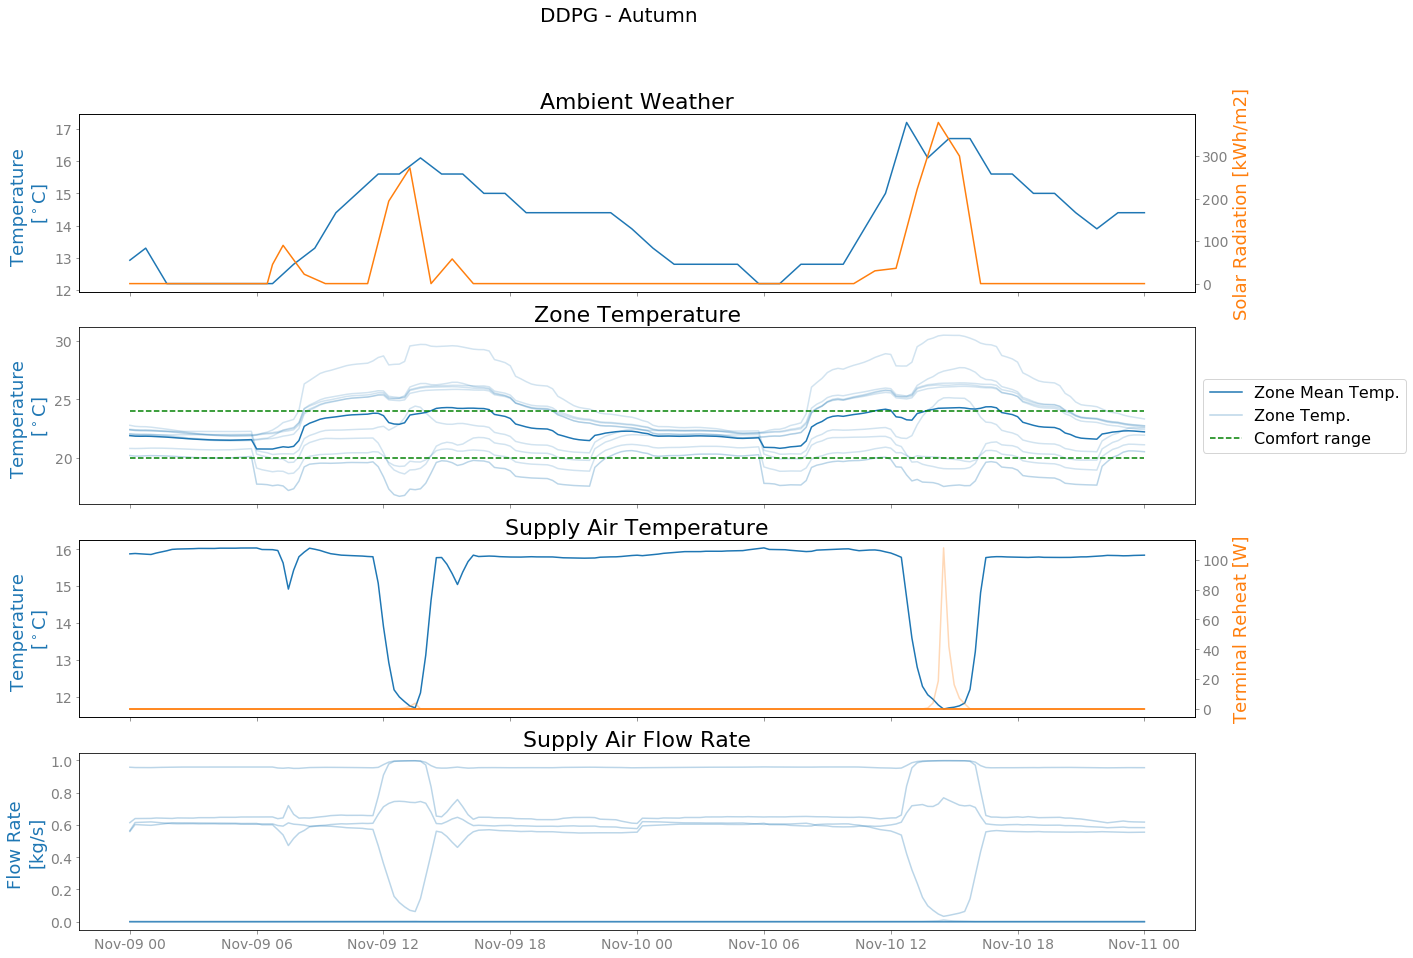

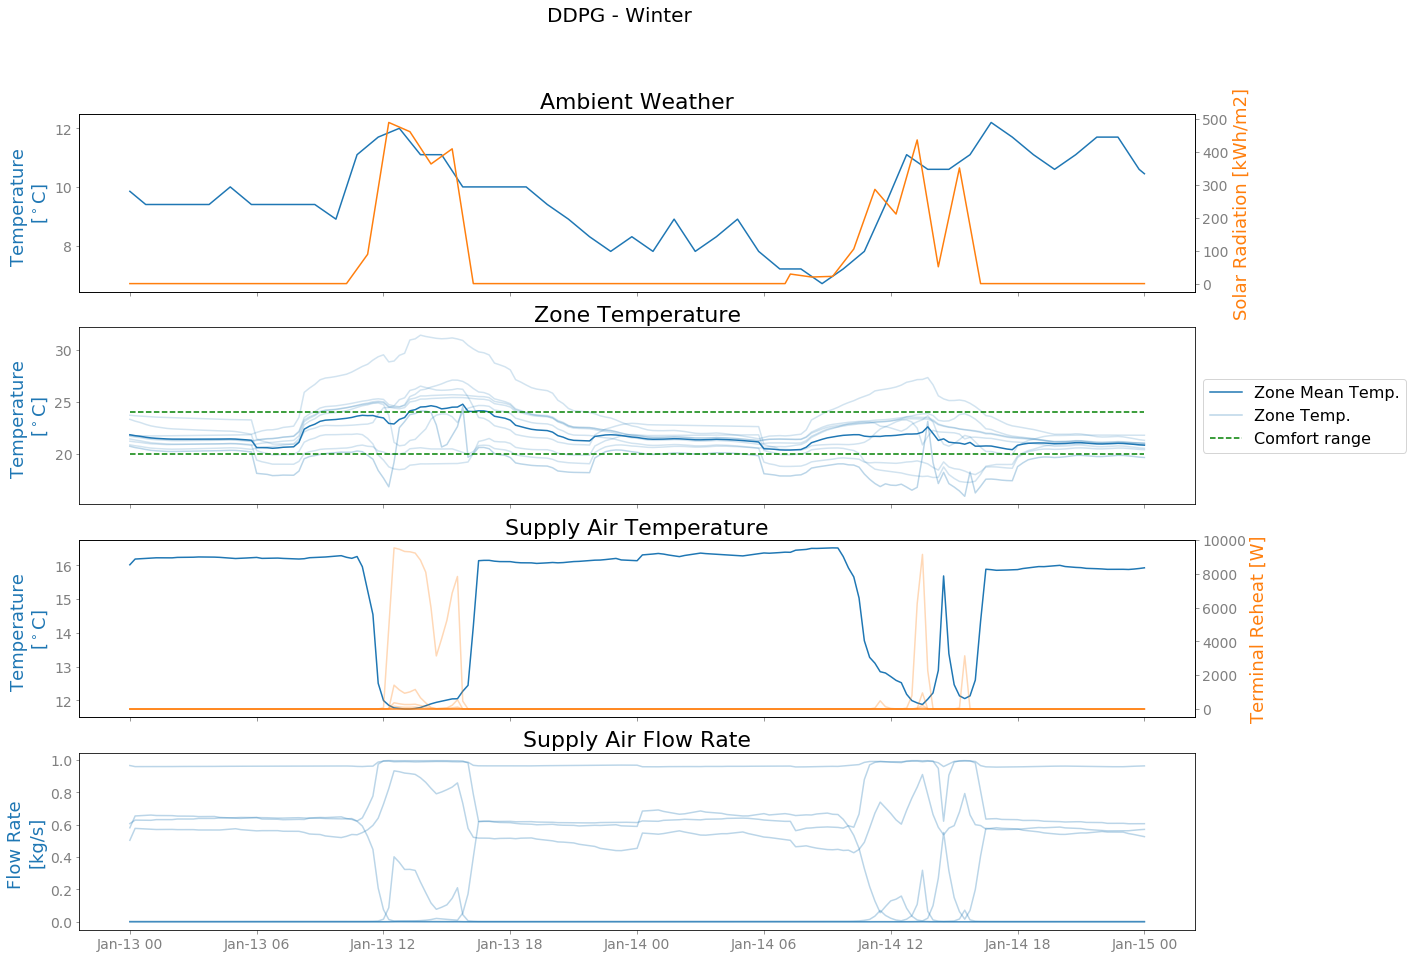

In [27]:
plots = {'DDPG - Spring': ['3/21/2015','3/23/2015'],
         'DDPG - Summer': ['6/23/2015','6/25/2015'],
         'DDPG - Autumn': ['11/09/2015','11/11/2015'],
         'DDPG - Winter': ['1/13/2015','1/15/2015']}

for fig_name, date in plots.items():
    plot_ts(date, data, fig_name)

## VAV

In [85]:
data = ddpg.copy()

fig_path = 'fig/vav'

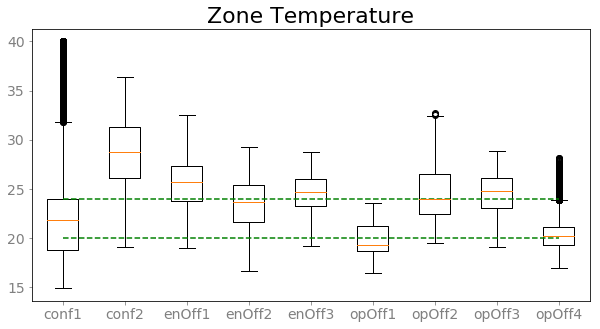

In [86]:
data_temp_box = []
for temp in temps:
    data_temp_box.append(data[data['officeHour']][temp].values)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Zone Temperature')
ax.boxplot(data_temp_box)
ax.plot((1,9), (24, 24), 'g--', label='Comfort range')
ax.plot((1,9), (20, 20), 'g--')

plt.xticks(range(1,10), zones)

plt.savefig('{}/tempBox.png'.format(fig_path))

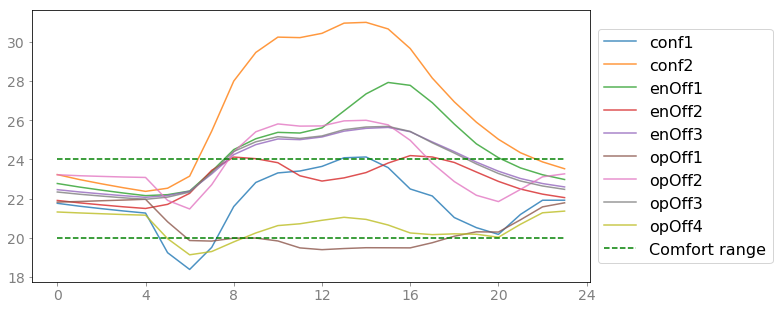

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
for zone,temp in zip(zones,temps):
    zone_temp = data[['hour',temp]]
    zone_temp_hour = zone_temp.groupby('hour').mean()
    ax.plot(range(24), zone_temp_hour, label=zone, alpha=0.8)
ax.plot((range(24)[0],range(24)[-1]), (24, 24), 'g--', label='Comfort range')
ax.plot((range(24)[0],range(24)[-1]), (20, 20), 'g--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(0,25,4), range(0,25,4))

plt.savefig('{}/hourMean.png'.format(fig_path))

In [88]:
data_officeHour = data[data['officeHour']]

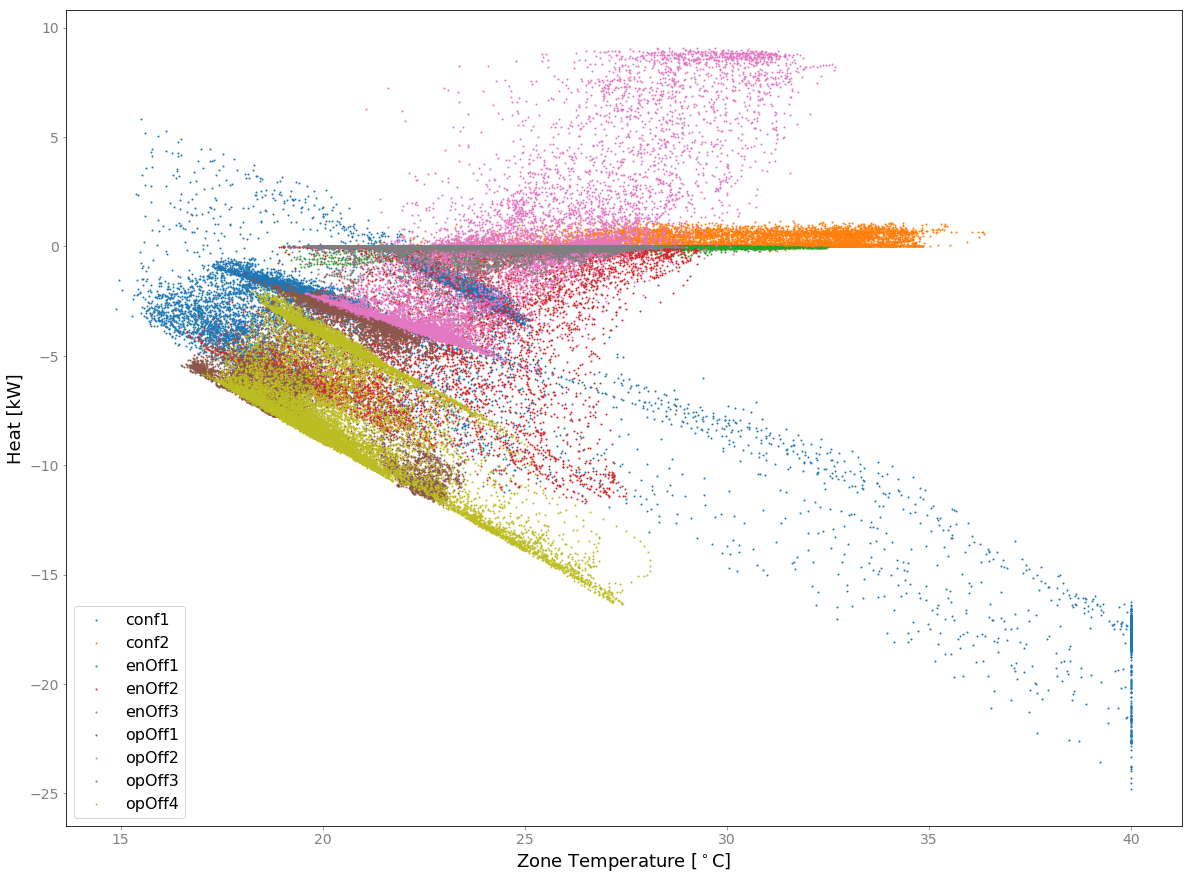

In [94]:
fig, ax = plt.subplots(figsize=(20,15))
for zone in zones:
    zone_temp = data_officeHour[zone+'Temp'].values
    zone_fr = data_officeHour[zone+'FR'].values
    zone_reheat = data_officeHour[zone+'Reheat'].values
    ahu_temp = data_officeHour['ahuSAT'].values
    zone_heat_kw = ((ahu_temp-zone_temp)*zone_fr*Cair + zone_reheat)/1000
    
    ax.scatter(zone_temp, zone_heat_kw, label=zone, s=1)
ax.set_xlabel('Zone Temperature [$^\circ$C]')
ax.set_ylabel('Heat [kW]')
plt.legend(loc=3)

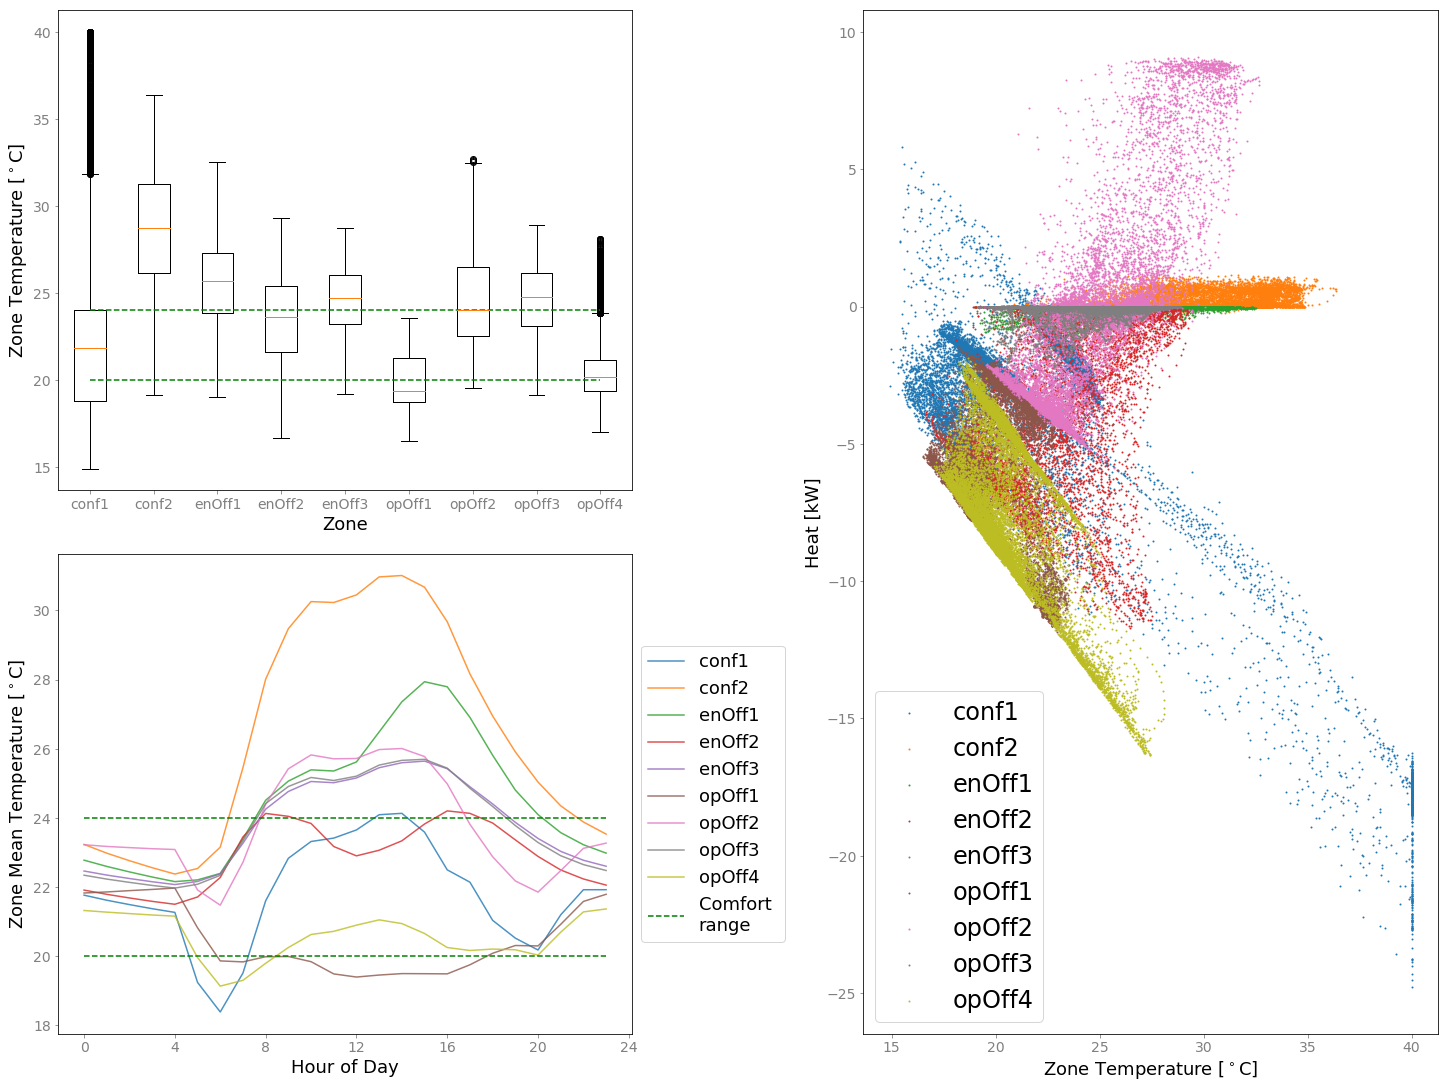

In [111]:
fig = plt.figure(constrained_layout=True, figsize=(20,15))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

data_temp_box = []
for temp in temps:
    data_temp_box.append(data[data['officeHour']][temp].values)
ax1.boxplot(data_temp_box)
ax1.plot((1,9), (24, 24), 'g--', label='Comfort range')
ax1.plot((1,9), (20, 20), 'g--')
ax1.set_xticks(range(1,10))
ax1.set_xticklabels(zones)

ax1.set_xlabel('Zone')
ax1.set_ylabel('Zone Temperature [$^\circ$C]')

for zone,temp in zip(zones,temps):
    zone_temp = data[['hour',temp]]
    zone_temp_hour = zone_temp.groupby('hour').mean()
    ax2.plot(range(24), zone_temp_hour, label=zone, alpha=0.8)
ax2.plot((range(24)[0],range(24)[-1]), (24, 24), 'g--', label='Comfort \nrange')
ax2.plot((range(24)[0],range(24)[-1]), (20, 20), 'g--')
ax2.set_xticks(range(0,25,4))
ax2.set_xticklabels(range(0,25,4))
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Zone Mean Temperature [$^\circ$C]')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 18})

data_officeHour = data[data['officeHour']]
for zone in zones:
    zone_temp = data_officeHour[zone+'Temp'].values
    zone_fr = data_officeHour[zone+'FR'].values
    zone_reheat = data_officeHour[zone+'Reheat'].values
    ahu_temp = data_officeHour['ahuSAT'].values
    zone_heat_kw = ((ahu_temp-zone_temp)*zone_fr*Cair + zone_reheat)/1000
    
    ax3.scatter(zone_temp, zone_heat_kw, label=zone, s=1)
ax3.set_xlabel('Zone Temperature [$^\circ$C]')
ax3.set_ylabel('Heat [kW]')
ax3.legend(loc=3, prop={'size': 24})

plt.savefig('{}/VAV.png'.format(fig_path))

## AHU

In [112]:
data = ddpg.copy()
data = data[data['officeHour']]

fig_path = 'fig/ahu'

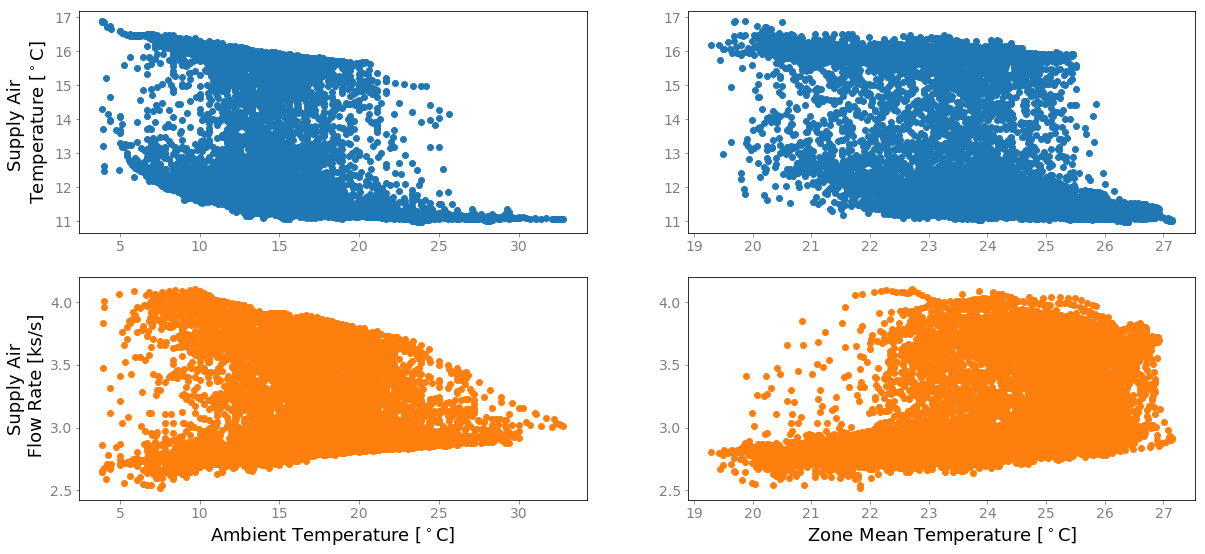

In [113]:
fig, axs = plt.subplots(2, 2,figsize=(20,9))
zone_mean_temp = data[temps].mean(axis=1).values
fr_total = data[frs].sum(axis=1).values

axs[0, 0].scatter(data['outTemp'].values, data['ahuSAT'].values, c=default_colors[0])
axs[1, 0].scatter(data['outTemp'].values, fr_total, c=default_colors[1])

axs[0, 1].scatter(zone_mean_temp, data['ahuSAT'].values, c=default_colors[0])
axs[1, 1].scatter(zone_mean_temp, fr_total, c=default_colors[1])

axs[0, 0].set_ylabel('Supply Air \nTemperature [$^\circ$C]')
axs[1, 0].set_ylabel('Supply Air\n Flow Rate [ks/s]')  

axs[1, 0].set_xlabel('Ambient Temperature [$^\circ$C]')
axs[1, 1].set_xlabel('Zone Mean Temperature [$^\circ$C]')

plt.savefig('{}/AHU.png'.format(fig_path))